In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)
#import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [32]:
housing_data = pd.read_excel('finalcolumns.xlsx')
housing_data.head()

,id,zip,prop_latitude,prop_longitude,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_bedrms,Duration prior,duration equity,Loan Amount,starting equity,ending equity,price increase/decrease,Starting Rate,Ending Rate,Rate Difference
0,52218838,46217,39.655831,-86.218025,2011,6926.0,2999.0,2399.0,4,2231,0.203744,0.990105,0.009895,0.213639,0.122557,4.8360,4.010,0.8260
1,52713937,46268,39.874484,-86.247279,1995,11069.0,3412.0,2350.0,4,3775,0.344749,0.751880,0.248120,0.592869,0.199417,6.2175,4.010,2.2075
2,51938159,46217,39.671222,-86.161665,1955,18992.0,2796.0,2152.0,2,1214,0.110868,0.800000,0.200000,0.310868,-0.000912,3.7100,4.570,-0.8600
3,51511949,46239,39.694670,-86.013174,2006,10759.0,4350.0,2680.0,4,3564,0.325479,0.751881,0.248119,0.573599,-0.224450,6.5240,3.600,2.9240
4,51994006,46227,39.670611,-86.125501,1957,13983.0,2966.0,1336.0,3,4891,0.446667,0.751882,0.248118,0.694784,-0.122242,6.1125,3.694,2.4185


In [33]:
housing_data = pd.get_dummies(housing_data)
housing_data.head()

,id,zip,prop_latitude,prop_longitude,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_bedrms,Duration prior,duration equity,Loan Amount,starting equity,ending equity,price increase/decrease,Starting Rate,Ending Rate,Rate Difference
0,52218838,46217,39.655831,-86.218025,2011,6926.0,2999.0,2399.0,4,2231,0.203744,0.990105,0.009895,0.213639,0.122557,4.8360,4.010,0.8260
1,52713937,46268,39.874484,-86.247279,1995,11069.0,3412.0,2350.0,4,3775,0.344749,0.751880,0.248120,0.592869,0.199417,6.2175,4.010,2.2075
2,51938159,46217,39.671222,-86.161665,1955,18992.0,2796.0,2152.0,2,1214,0.110868,0.800000,0.200000,0.310868,-0.000912,3.7100,4.570,-0.8600
3,51511949,46239,39.694670,-86.013174,2006,10759.0,4350.0,2680.0,4,3564,0.325479,0.751881,0.248119,0.573599,-0.224450,6.5240,3.600,2.9240
4,51994006,46227,39.670611,-86.125501,1957,13983.0,2966.0,1336.0,3,4891,0.446667,0.751882,0.248118,0.694784,-0.122242,6.1125,3.694,2.4185


In [34]:
housing_data_dropped = housing_data.drop(columns=['prop_latitude', 'prop_longitude'])
housing_data_dropped = housing_data.dropna()
housing_data.head()

,id,zip,prop_latitude,prop_longitude,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_bedrms,Duration prior,duration equity,Loan Amount,starting equity,ending equity,price increase/decrease,Starting Rate,Ending Rate,Rate Difference
0,52218838,46217,39.655831,-86.218025,2011,6926.0,2999.0,2399.0,4,2231,0.203744,0.990105,0.009895,0.213639,0.122557,4.8360,4.010,0.8260
1,52713937,46268,39.874484,-86.247279,1995,11069.0,3412.0,2350.0,4,3775,0.344749,0.751880,0.248120,0.592869,0.199417,6.2175,4.010,2.2075
2,51938159,46217,39.671222,-86.161665,1955,18992.0,2796.0,2152.0,2,1214,0.110868,0.800000,0.200000,0.310868,-0.000912,3.7100,4.570,-0.8600
3,51511949,46239,39.694670,-86.013174,2006,10759.0,4350.0,2680.0,4,3564,0.325479,0.751881,0.248119,0.573599,-0.224450,6.5240,3.600,2.9240
4,51994006,46227,39.670611,-86.125501,1957,13983.0,2966.0,1336.0,3,4891,0.446667,0.751882,0.248118,0.694784,-0.122242,6.1125,3.694,2.4185


In [35]:
X = housing_data_dropped[['zip', 'prop_yrbld', 'prop_landsqft', 'prop_bldsqft', 'prop_livingsqft', 'prop_bedrms', 'price increase/decrease', 'Loan Amount', 'starting equity', 'ending equity', 'Starting Rate', 'Ending Rate', 'Rate Difference']]
y = housing_data_dropped["Duration prior"].values.reshape(-1, 1)
print(X.shape, y.shape)

(17875, 13) (17875, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [38]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [40]:
model.score(X_train_scaled, y_train_scaled)

0.9983184646798212

In [100]:
model.score(X_test_scaled, y_test_scaled)

0.9962536240217829

### predictions = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Housing Prediction")
plt.show()

In [41]:
# from sklearn.metrics import mean_squared_error
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)
# print(f"MSE: {MSE}, R2: {r2}")

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0037778217578162297, R2: 0.9962539587391769


In [43]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0699056475157282, R2: 0.9306824258141152


In [44]:
model.predict(X)

array([[-8.28509953e+10],
       [-7.97985121e+10],
       [-9.78786219e+10],
       ...,
       [-1.17648118e+11],
       [-7.20544930e+10],
       [-1.31474984e+11]])

In [51]:
X.shape

(17875, 13)

In [45]:
y

array([[2231],
       [3775],
       [1214],
       ...,
       [1431],
       [3173],
       [ 576]])

In [46]:
model.score(X,y)

-3804579694157958.0

In [47]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-1.87752979e-04 -6.83726938e-04 -1.88926716e-05 -1.18441554e-03
   3.93207403e-04 -2.70271774e-04  3.74966735e-05 -3.74326628e+09
  -3.74326628e+09  5.36198338e+00 -9.69552249e+10  7.67724789e+10
   9.91647675e+10]]
y-axis intercept:  [-1.88791937e-05]


In [54]:
np.array([X.min()]).shape

(1, 13)

In [91]:
X.min()

zip                        46201.000000
prop_yrbld                  1900.000000
prop_landsqft                436.000000
prop_bldsqft                 462.000000
prop_livingsqft              431.000000
prop_bedrms                    1.000000
price increase/decrease    -2987.020751
Loan Amount                    0.000000
starting equity              -83.361133
ending equity                -83.346795
Starting Rate                  3.345000
Ending Rate                    3.232500
Rate Difference               -1.532500
dtype: float64

In [55]:
x_min = np.array([X.min()])
x_max = np.array([X.max()])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 4.62010000e+04  1.90000000e+03  4.36000000e+02  4.62000000e+02
   4.31000000e+02  1.00000000e+00 -2.98702075e+03  0.00000000e+00
  -8.33611331e+01 -8.33467952e+01  3.34500000e+00  3.23250000e+00
  -1.53250000e+00]]
Max X Value: [[4.62900000e+04 2.01700000e+03 4.32629512e+08 2.50040000e+04
  1.30340000e+04 9.00000000e+00 9.58841197e-01 8.43611331e+01
  1.00000000e+00 1.69031963e+00 1.27087500e+01 8.02750000e+00
  6.67125000e+00]]


In [56]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [86]:
x_min.shape, x_max.shape, y_min.shape, y_max.shape, X.shape, y.shape

((1, 13), (1, 13), (1, 1), (1, 1), (17875, 13), (17875, 1))

In [81]:
X

,zip,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_bedrms,price increase/decrease,Loan Amount,starting equity,ending equity,Starting Rate,Ending Rate,Rate Difference
0,46217,2011,6926.0,2999.0,2399.0,4,0.122557,0.990105,0.009895,0.213639,4.8360,4.0100,0.8260
1,46268,1995,11069.0,3412.0,2350.0,4,0.199417,0.751880,0.248120,0.592869,6.2175,4.0100,2.2075
2,46217,1955,18992.0,2796.0,2152.0,2,-0.000912,0.800000,0.200000,0.310868,3.7100,4.5700,-0.8600
3,46239,2006,10759.0,4350.0,2680.0,4,-0.224450,0.751881,0.248119,0.573599,6.5240,3.6000,2.9240
4,46227,1957,13983.0,2966.0,1336.0,3,-0.122242,0.751882,0.248118,0.694784,6.1125,3.6940,2.4185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17990,46202,2006,5140.0,4344.0,2896.0,3,0.148407,0.751880,0.248120,0.575335,6.6820,3.6940,2.9880
17991,46254,1990,12632.0,2858.0,2329.0,4,0.051620,0.751880,0.248120,0.650586,7.0140,4.3375,2.6765
17992,46219,1954,7405.0,1808.0,904.0,2,0.083484,0.751880,0.248120,0.378805,7.9120,5.8675,2.0445
17993,46250,1987,5009.0,1527.0,1023.0,2,-0.311226,0.668340,0.331660,0.621432,6.6820,3.7100,2.9720


In [97]:
x_min[:,1]

array([1900.])

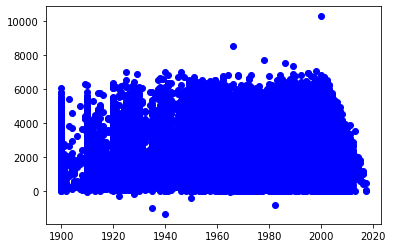

In [102]:
plt.scatter(X[["prop_yrbld"]], y, c='blue')
#plt.plot([x_min[:,1], x_max[:,1]], [y_min[0], y_max[0]], c='red')